In [1]:
# Alice own code to calculate and plot the Hydrogen mass functions for z = 1
 
# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge# DRAGONS modules for reading and dealing with model ouput
import pandas as pd
from Functions import *

# import meraxes and set little h to 0.7
fname_in = "imapping_testrun/meraxes.hdf5"
h = meraxes.set_little_h(0.7)

# Get the snapshot, redshift and light time info
snaplist = meraxes.io.read_snaplist(fname_in, h)
#print('snapshots :', snaplist[0][1]) # uncomment to see available shapshots

# INPUT SNAP SHOT WANTED HERE
snapshot_used = 250
snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = round(redshift_used, 1) # round float to nearest whole int

# Read in Galaxy catalogue : Snapshot 192 corresponds to z = 1 
gals, sim_props = meraxes.read_gals(fname_in, snapshot_used, sim_props=True)

In [2]:
# get units
#units = meraxes.read_units(fname_in)
#HIMass_units = units['HIMass']

# The units of stellar masses ouput by the model are 1e10 Msol.  
# Let's convert into appropriate units (log10(M/Msol)) (Msol is in 1e10)
gals["HIMass"] = np.log10(gals["HIMass"]*1e10)
#print('\ngals: \n', gals["HIMass"], HIMass_units)

# Calculate the number of galaxies
# gal_num = len(gals)
# Calculate the volume of the simulation 
#Sim_Vol = sim_props["Volume"]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


In [3]:
# Create own mass function
# HImf = "HIMass function" is a number density of galaxies in the universe as a function of their HI mass

# HIMF (Phi) can be expressed as Phi = Ngal / (V * bin_width)
#N_gal (number of galaxies), V is volume, bin_width is the HI mass bin width
# counts can be number of galaxies from histogram

HIMF = ALICE_mass_function(gals["HIMass"],  sim_props["Volume"], bins=50, range=(5.5, 11.5))
#print(type(HIMF))

# Using munges existing MF 
# HImf = munge.mass_function(gals["HIMass"], sim_props["Volume"], bins=50, range=(7.5, 11.5))

N_gals  :  [  3650   4937   6327   8231  10545  13208  17059  21890  27908  35837
  46766  62149  83141 108465 131755 148411 152405 146191 129912 109999
  89036  70514  53703  39941  29249  20673  14036   9811   7224   5489
   4448   3456   2702   2015   1412    916    579    339    166     62
     28     12      7      7      3      7      5      1      0      2]
edges  :  [ 5.5   5.62  5.74  5.86  5.98  6.1   6.22  6.34  6.46  6.58  6.7   6.82
  6.94  7.06  7.18  7.3   7.42  7.54  7.66  7.78  7.9   8.02  8.14  8.26
  8.38  8.5   8.62  8.74  8.86  8.98  9.1   9.22  9.34  9.46  9.58  9.7
  9.82  9.94 10.06 10.18 10.3  10.42 10.54 10.66 10.78 10.9  11.02 11.14
 11.26 11.38 11.5 ]
bin width  :  0.119999886
bin_center :  [ 5.56       5.68       5.8        5.92       6.04       6.16
  6.2799997  6.4        6.52       6.64       6.76       6.88
  7.         7.12       7.24       7.36       7.48       7.6
  7.7200003  7.84       7.96       8.08       8.200001   8.32
  8.440001   8.559999   8

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


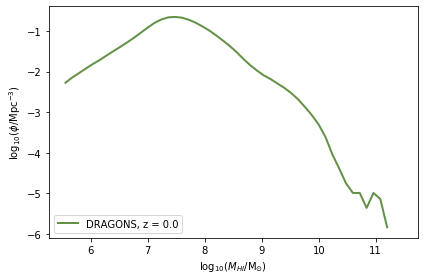

In [4]:
# DRAGONS HIMF 

# Now let's plot the mass function...
# Create a new figure (with 1 column and 1 row) and axis
fig, ax = plt.subplots(1, 1)
# plt.title("Hydrogen Mass Function for z = 1, separating Central and Satelitte Galaxies")

# Plot the mass function
# HIMF[:,0] corresponds to all the elements in the 0th array (The Mass)
# HIMF[:,1] corresponds to all the elements in the 1st array (The Mass Function)
label_graph_DRAGONS = ('DRAGONS, z = ' + str(redshift_used))
ax.plot(HIMF[:, 0], np.log10(HIMF[:, 1]), color=np.random.rand(3,), lw=2,
        label=label_graph_DRAGONS)

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI} / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^{-3}})$")

# Add the legend
ax.legend(loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()

redshift_string = str(redshift_used)
redshift_string = redshift_string.replace('.','-')
name_of_plot=("HIMassFunction_z-" + str(redshift_string))
plt.savefig("plots/wDATA/" + name_of_plot + ".pdf")

log_MHI :  [ 7.186   7.3345  7.483   7.6315  7.78    7.9285  8.077   8.2255  8.374
  8.5225  8.671   8.8195  8.968   9.1165  9.265   9.4135  9.562   9.7105
  9.859  10.0075 10.156  10.3045 10.453  10.6015 10.75  ]
log_HIMF :  [-0.733  -0.8838 -1.1    -1.056  -1.207  -1.35   -1.315  -1.331  -1.308
 -1.31   -1.455  -1.555  -1.55   -1.69   -1.735  -1.843  -1.974  -2.166
 -2.401  -2.785  -3.013  -3.417  -4.044  -4.83   -5.451 ]


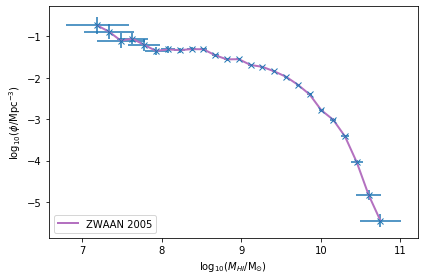

In [5]:
# ZWAAN 2005 DATA SET

# Now lets plot the new data on top of the HIMF graph
# Pull in the data
file_Zwaan = open("data/HIMF_Zwaan2005.data", "r")
fileread_Zwaan = file_Zwaan.readlines()
for line in fileread_Zwaan:
    if line.startswith("#"):
        continue # skips that iteration 

data_Zwaan = np.loadtxt(fileread_Zwaan, delimiter=" ")
#print(data_Zwaan)
log_MHI_Zwaan = data_Zwaan[:,0]
print('log_MHI : ', log_MHI_Zwaan)
log_HIMF_Zwaan = data_Zwaan[:,1]
print('log_HIMF : ', log_HIMF_Zwaan)

# Now let's plot the mass function from the ZWAAN 2005
# Create a new figure (with 1 column and 1 row) and axis
fig, ax = plt.subplots(1, 1)
# plt.title("Hydrogen Mass Function for z = 1, separating Central and Satelitte Galaxies")

# Plot the mass function
# data_Zwaan[:,0]corresponds to all the elements in the 0th array (The log_MHI)
# data_Zwaan[:,1] corresponds to all the elements in the 1st array (The log_HIMF)
label_graph_ZWAAN =('ZWAAN 2005')
ax.plot(data_Zwaan[:,0], data_Zwaan[:,1], color=np.random.rand(3,), lw=2,
        label=label_graph_ZWAAN)
ax.errorbar(data_Zwaan[:,0], data_Zwaan[:,1],
            xerr=data_Zwaan[:,2],
            yerr=data_Zwaan[:,3],
            fmt='x')
# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI} / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^{-3}})$")

# Add the legend
ax.legend(loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("HIMassFunction_ZWAAN-2005")
plt.savefig("plots/wDATA/" + name_of_plot + ".pdf")

log_MHI :  [ 6.3  6.5  6.7  6.9  7.1  7.3  7.5  7.7  7.9  8.1  8.3  8.5  8.7  8.9
  9.1  9.3  9.5  9.7  9.9 10.1 10.3 10.5 10.7 10.9]
log_HIMF :  [-0.743 -0.839 -0.875 -0.935 -1.065 -1.13  -1.163 -1.224 -1.363 -1.46
 -1.493 -1.573 -1.664 -1.689 -1.673 -1.74  -1.893 -2.061 -2.288 -2.596
 -3.006 -3.641 -4.428 -5.32 ]


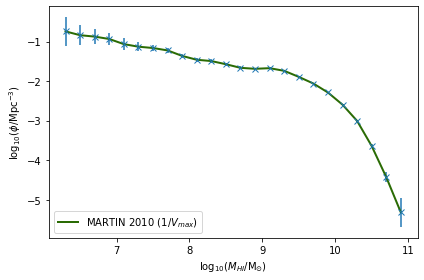

In [6]:
# MARTIN 2010 DATA SET FOR 1/ V_max Method

# Now lets plot the new data on top of the HIMF graph
# Pull in the data
file_Martin_VMAX = open("data/HIMF_Martin2010_1-VMAX.data", "r")# from here on Data from Martin 2010 1/VMax method will be referred to as data_MV
fileread_MV = file_Martin_VMAX.readlines()
for line in fileread_MV:
    if line.startswith("#"):
        continue # skips that iteration 


data_MV = np.loadtxt(fileread_MV, delimiter="  ") 
#print(data_Zwaan)
log_MHI_MV = data_MV[:,0]
print('log_MHI : ', log_MHI_MV)
log_HIMF_MV = data_MV[:,1]
print('log_HIMF : ', log_HIMF_MV)

# Now let's plot the mass function from the MARTIN 2010
# Create a new figure (with 1 column and 1 row) and axis
fig, ax = plt.subplots(1, 1)
# plt.title("Hydrogen Mass Function for z = 1, separating Central and Satelitte Galaxies")

# Plot the mass function for Martin 2010 1 / V_max data set
# data_Martin[:,0]corresponds to all the elements in the 0th array (The log_MHI)
# data_Martin[:,1] corresponds to all the elements in the 1st array (The log_HIMF)
label_graph_MARTIN = ("MARTIN 2010 (1/$V_{max}$)")
ax.plot(data_MV[:,0], data_MV[:,1], color=np.random.rand(3,), lw=2,
        label=label_graph_MARTIN)
ax.errorbar(data_MV[:,0], data_MV[:,1],
            xerr=None,
            yerr=data_MV[:,2],
            fmt='x')

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI} / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^{-3}})$")

# Add the legend
ax.legend(loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()
name_of_plot=("HImf_new_Function_MARTIN_V-MAX-2010")
plt.savefig("plots/wDATA/" + name_of_plot + ".pdf")

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


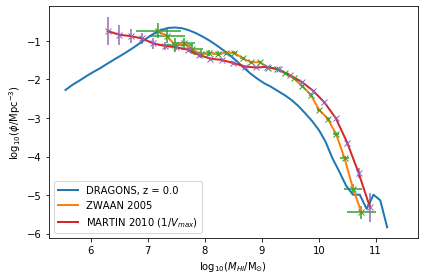

In [7]:
# FULL PLOT FOR DRAGONS, ZWAAN 2005 AND MARTINS 2010

# Now plot the simulation, the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)
# DRAGONS
ax.plot(HIMF[:, 0], np.log10(HIMF[:, 1]), lw=2,
        label=label_graph_DRAGONS)

# ZWAAN 2005
ax.plot(data_Zwaan[:,0], data_Zwaan[:,1], lw=2, 
        label=label_graph_ZWAAN) # change to np.random.rand(3,) for random colours
ax.errorbar(data_Zwaan[:,0], data_Zwaan[:,1],
            xerr=data_Zwaan[:,2],
            yerr=data_Zwaan[:,3],
            fmt='x')

# MARTIN 2010
ax.plot(data_MV[:,0], data_MV[:,1], lw=2,
        label=label_graph_MARTIN)
ax.errorbar(data_MV[:,0], data_MV[:,1],
            xerr=None,
            yerr=data_MV[:,2],
            fmt='x')


# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_{HI} / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^{-3}})$")

# Add the legend
ax.legend(loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("HIMF_ZWAAN_MARTIN_COMPARISON")
plt.savefig("plots/wDATA/" + name_of_plot + ".pdf")